導入函式庫 & 查看GPU運行狀態

In [1]:
import torch
import torchvision
import numpy as np
import cv2

print("GPU IS WORKED ? " , torch.cuda.is_available())

if torch.cuda.is_available():
  info = torch.cuda.get_device_properties(0)
  print(info)

GPU IS WORKED ?  True
_CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


欲執行程式麻煩移動到該程式碼所在路徑或是使用絕對位置

% 比照 Linux  命令

! 比照 ipython 命令

In [2]:
### 移動Colab的方法有兩種
# 1.Command: %cd
%cd /content/drive/My Drive

# 2.Ipython: os.chdir()
import os
path = '/content/drive/MyDrive/人生KPI/工作坊/1091120_NQU_AI'
os.chdir(path)

# 在ipython環境中建議使用 ! 會比較好 % 用來移動路徑即可
!pwd 
!ls

/content/drive/My Drive
/content/drive/MyDrive/人生KPI/工作坊/1091120_NQU_AI
00_StreamVideo.ipynb	 04_ObjDetection.ipynb	1120_NQU_AI.pptx  test.ipynb
01_TM2.ipynb		 05_Car_Person.ipynb	figure		  tm
02_Classification.ipynb  06_YOLOv5.ipynb	images		  transfer
03_CompareModel.ipynb	 07_CustomYOLOv5.ipynb	labels


解壓縮 Teachable Machine 的壓縮檔案

In [ ]:
!unzip converted_keras.zip

Archive:  converted_keras.zip
 extracting: keras_model.h5          
 extracting: labels.txt              


Colab 拍照模塊

In [3]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='tm/test_photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to tm/test_photo.jpg


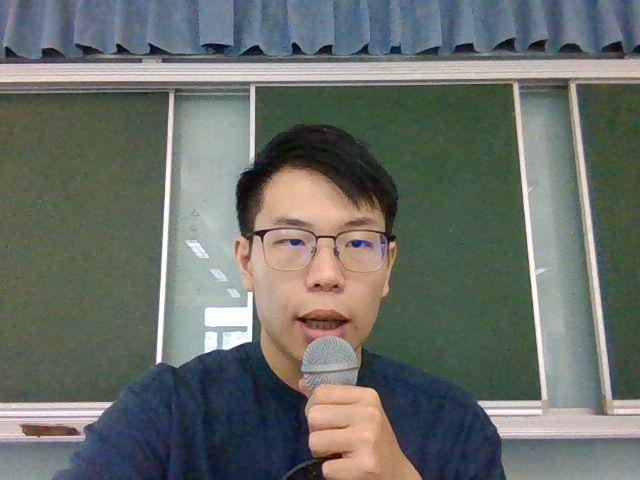

In [4]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

複製 Teachable Machine 的程式碼

In [5]:
import tensorflow.keras
from PIL import Image, ImageOps
import numpy as np

# 設定 numpy 顯示的內容
np.set_printoptions(suppress=True)

# 導入模型
model = tensorflow.keras.models.load_model('tm/keras_model.h5')

# 設定資料型態
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

# 輸入圖片
image = Image.open('tm/test_photo.jpg')

# 設定模型大小
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS)

# 轉換成 numpy 格式
image_array = np.asarray(image)

# 顯示
image.show()

# 正規化
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1

# 將圖片資訊填入資料型態
data[0] = normalized_image_array

# 進行預測 (推論)
prediction = model.predict(data)

# 打印結果
print(prediction)

[[0.9996451  0.00032431 0.00003063]]


稍微改動一下